In [1]:
from celluloid import Camera
from IPython.display import Video
import matplotlib.pyplot as plt
import numpy as np

from cpr_reputation.board import *

In [2]:
np.random.seed(1024)

In [13]:
env = HarvestEnv(num_agents=6, size=(25, 15), num_crosses=15)
env.game.board

array([[0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

In [14]:
for name, agent in env.game.agents.items():
    print(name)
    print(f"position: {agent.pos}")
    print(f"rot: {agent.rot}")
    print(f"[top left, bottom right] coordinates of observation: {env.game.get_observable_window(name)}") 
    print(f"observation size: {env.game.get_agent_obs(name).shape}\n")

Agent0
position: (0, 0)
rot: 2
[top left, bottom right] coordinates of observation: [(0, 0), (20, 10)]
observation size: (21, 11)

Agent1
position: (0, 1)
rot: 2
[top left, bottom right] coordinates of observation: [(0, 0), (20, 11)]
observation size: (21, 12)

Agent2
position: (0, 2)
rot: 1
[top left, bottom right] coordinates of observation: [(0, 2), (10, 14)]
observation size: (11, 13)

Agent3
position: (1, 0)
rot: 2
[top left, bottom right] coordinates of observation: [(1, 0), (21, 10)]
observation size: (21, 11)

Agent4
position: (1, 1)
rot: 1
[top left, bottom right] coordinates of observation: [(0, 1), (11, 14)]
observation size: (12, 14)

Agent5
position: (1, 2)
rot: 2
[top left, bottom right] coordinates of observation: [(1, 0), (21, 12)]
observation size: (21, 13)



In [18]:
# agent at (0, 1) looking south
env.game.get_agent_obs('Agent1')

array([[0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.

In [19]:
# agent at (1, 1) looking east
env.game.get_agent_obs('Agent4')

array([[0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.]])

In [28]:
# agent at (1, 1) looking east zaps agents at (0, 1), (0, 2), (1, 2)
env.game.process_action('Agent4', 6)
for name, agent in env.game.agents.items(): 
    print(f"{name} is frozen for {agent.frozen} steps and has reputation {env.game.reputation[name]}")

Agent0 is frozen for 0 steps and has reputation 0
Agent1 is frozen for 25 steps and has reputation 0
Agent2 is frozen for 25 steps and has reputation 0
Agent3 is frozen for 0 steps and has reputation 0
Agent4 is frozen for 0 steps and has reputation 7
Agent5 is frozen for 25 steps and has reputation 0


In [5]:
env = HarvestGame(num_agents=10, size=(50, 50))
for _, agent in env.agents.items():
    agent.rot = 2
env.process_action("Agent0", SHOOT)
assert env.reputation["Agent0"] == 1
for i in range(1, 4):
    assert env.reputation[f"Agent{i}"] == 0
for name, agent in env.agents.items():
    print(name, agent)

Agent0 Walker(pos=Position(i=0, j=0), rot=2, frozen=0)
Agent1 Walker(pos=Position(i=0, j=1), rot=2, frozen=25)
Agent2 Walker(pos=Position(i=0, j=2), rot=2, frozen=25)
Agent3 Walker(pos=Position(i=0, j=3), rot=2, frozen=25)
Agent4 Walker(pos=Position(i=1, j=0), rot=2, frozen=25)
Agent5 Walker(pos=Position(i=1, j=1), rot=2, frozen=25)
Agent6 Walker(pos=Position(i=1, j=2), rot=2, frozen=25)
Agent7 Walker(pos=Position(i=1, j=3), rot=2, frozen=25)
Agent8 Walker(pos=Position(i=2, j=0), rot=2, frozen=25)
Agent9 Walker(pos=Position(i=2, j=1), rot=2, frozen=25)


In [6]:
env.get_beam_bounds("Agent9")

(Position(i=12, j=6), Position(i=2, j=-4))

# unit test: test_agent_get_obs_board_items

In [39]:
from cpr_reputation.board import HarvestGame, create_board
import numpy as np
size = (4, 6)
apples = [(0, 5), (2, 3)]
env = HarvestGame(num_agents=4, size=size)

env.board = create_board(size, apples)
for agent_id, agent in env.agents.items():
    agent.rot = 2  # south

In [40]:
obs = env.get_agent_obs("Agent3")  # facing south
obs_apples = np.where(obs[:, :, 0])
obs_agents = np.where(obs[:, :, 1])
obs_walls = np.where(obs[:, :, 2])

expected_apples = [(19, 6), (19, 8), (18, 9), (18, 8), (18, 7), (17, 8)]
expected_agents = [(19, 10), (19, 11)]
expected_walls = [(17, 6), (17, 7), (17, 8), (17, 9), (17, 10), (17, 11), (18, 6), (18, 11), (19, 6), (19, 11)]

assert sorted(zip(*obs_apples)) == sorted(expected_apples)
assert sorted(zip(*obs_agents)) == sorted(expected_agents)
assert sorted(zip(*obs_walls)) == sorted(expected_walls)

env._rotate_agent("Agent3", -1)  # facing east
obs = env.get_agent_obs("Agent3")
obs_apples = np.where(obs[:, :, 0])
obs_agents = np.where(obs[:, :, 1])
obs_walls = np.where(obs[:, :, 2])

expected_apples = [
    (15, 9),
    (15, 10),
    (16, 9),
    (16, 11),
    (17, 10),
    (17, 11),
    (17, 12),
    (18, 11),
]

expected_agents = [(19, 9), (19, 10)]
expected_walls = [(15, 9), (15, 10), (15, 11), (15, 12), (16, 9), (16, 12), (17, 9), (17, 12), (18, 9), (18, 12), (19, 9), (19, 12)]

assert sorted(zip(*obs_apples)) == sorted(expected_apples)
assert sorted(zip(*obs_agents)) == sorted(expected_agents)
assert sorted(zip(*obs_walls)) == sorted(expected_walls)

env._rotate_agent("Agent3", -1)  # facing north
obs = env.get_agent_obs("Agent3")
obs_apples = np.where(obs[:, :, 0])
obs_agents = np.where(obs[:, :, 1])
obs_walls = np.where(obs[:, :, 2])

expected_apples = [(18, 13), (18, 14), (19, 12), (19, 14)]
expected_agents = [(18, 9), (18, 10), (19, 9), (19, 10)]
expected_walls = [(18, 9), (18, 10), (18, 11), (18, 12), (18, 13), (18, 14), (19, 9), (19, 14)]

assert sorted(zip(*obs_apples)) == sorted(expected_apples)
assert sorted(zip(*obs_agents)) == sorted(expected_agents)
assert sorted(zip(*obs_walls)) == sorted(expected_walls)

env._rotate_agent("Agent3", -1)  # facing west
obs = env.get_agent_obs("Agent3")
obs_apples = np.where(obs[:, :, 0])
obs_agents = np.where(obs[:, :, 1])
obs_walls = np.where(obs[:, :, 2])

expected_apples = []
expected_agents = [(18, 10), (18, 11), (19, 10), (19, 11)]
expected_walls = [(18, 8), (18, 9), (18, 10), (18, 11), (19, 8), (19, 11)]

assert sorted(zip(*obs_apples)) == sorted(expected_apples)
assert sorted(zip(*obs_agents)) == sorted(expected_agents)
assert sorted(zip(*obs_walls)) == sorted(expected_walls)


# is_free for walls

In [6]:
from cpr_reputation.board import HarvestGame, create_board, walls_board
import numpy as np
size = (4, 6)
apples = [(0, 5), (2, 3)]
env = HarvestGame(num_agents=4, size=size)

env.board = create_board(size, apples)
for agent_id, agent in env.agents.items():
    agent.rot = 2  # south

In [10]:
list(zip(*np.where(walls_board(env.size))))

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (1, 0),
 (1, 5),
 (2, 0),
 (2, 5),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5)]

In [5]:
?create_board

Signature: create_board(size: 'Tuple[int, int]', apples: 'List[Tuple[int, int]]') -> 'Board'
Docstring: Creates an empty board with a number of cross-shaped apple patterns
File:      ~/Dropbox/Projects/AISC5/cpr_reputation/cpr_reputation/board.py
Type:      function


# misc

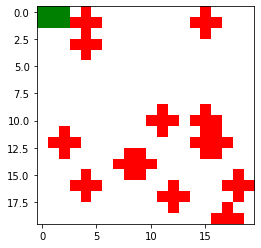

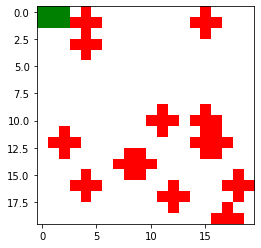

In [7]:
fig, ax = plt.subplots()
env.game.render(ax)
fig

NameError: name 'regenerate_apples' is not defined

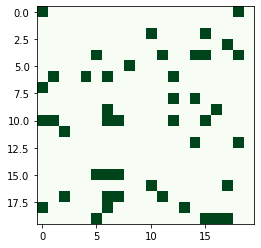

In [8]:
fig, ax = plt.subplots()

camera = Camera(fig)

board = random_board((20, 20), 0.1)
for _ in range(11):
    ax.imshow(board, vmin=0, vmax=1, cmap='Greens')
    camera.snap()
    board = regenerate_apples(board, 0.01)
    
animation = camera.animate()

animation.save("animation.mp4")

In [ ]:
Video("animation.mp4")